## Decision Tree Model

In [1]:
import pandas as pd

In [2]:
data=pd.read_excel('heart_disease.xlsx',sheet_name='Heart_disease')

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [4]:
data.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [5]:
data1=data.fillna(0)

In [6]:
data1.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [7]:
data1.duplicated().sum()

1

In [8]:
data1.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.0,downsloping,fixed defect,4


In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   908 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [10]:
data1.describe()
data1.drop(data1[['exang','fbs']],axis=1)

,age,sex,cp,trestbps,chol,restecg,thalch,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,lv hypertrophy,150,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,normal,132,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,normal,148,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,lv hypertrophy,190,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,normal,126,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,normal,120,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,st-t abnormality,120,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,lv hypertrophy,123,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,st-t abnormality,105,0.0,downsloping,fixed defect,4


In [12]:
import matplotlib.pyplot as plt
import seaborn as sn

In [13]:
numerical_cols=data1.select_dtypes(include=['int','float'])

<Axes: >

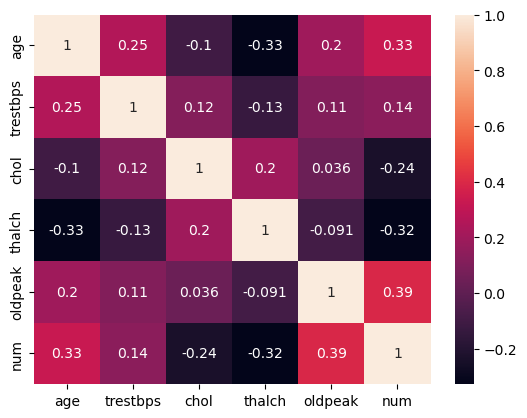

In [14]:
numerical_cols.corr()
colours=['blue','yellow']
sn.heatmap(numerical_cols.corr(),annot=True)

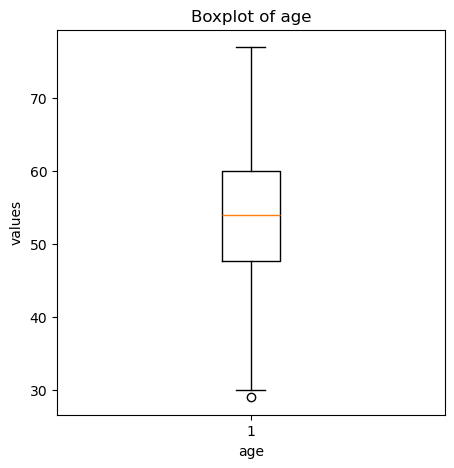

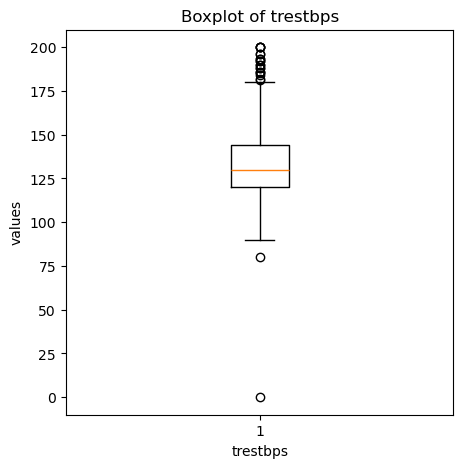

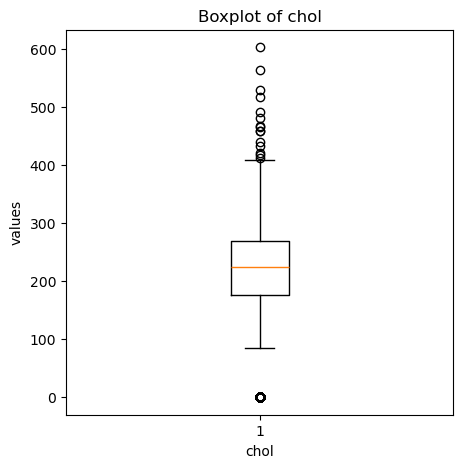

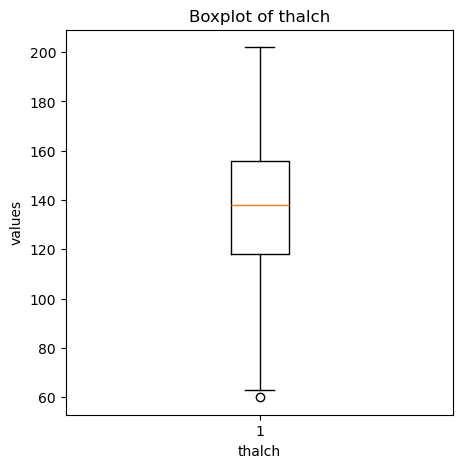

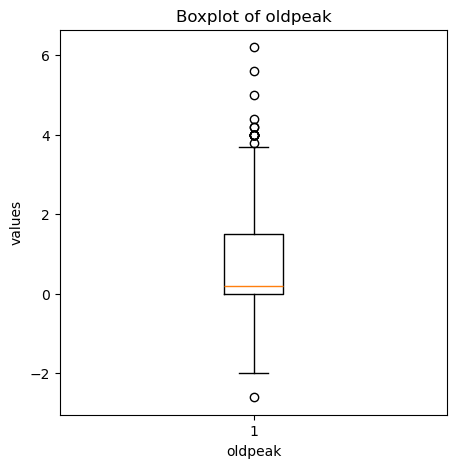

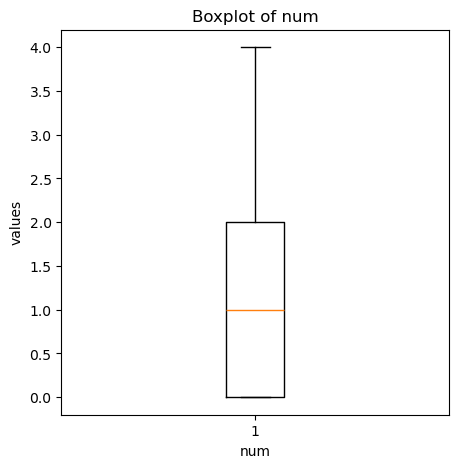

In [24]:
for cols in numerical_cols:
    plt.figure(figsize=(5,5))
    plt.boxplot(data1[cols])
    plt.xlabel(cols)
    plt.ylabel('values')
    plt.title(f'Boxplot of {cols}')

In [25]:
data1.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.830396,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.079518,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.200000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [26]:
data1

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.0,downsloping,fixed defect,4


In [32]:
data2=data1.drop('exang',axis=1)

In [34]:
data2

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,0.0,downsloping,fixed defect,4


In [38]:
categorical_cols=data2.select_dtypes(include=['object'])
categorical_cols

,sex,cp,restecg,slope,thal
0,Male,typical angina,lv hypertrophy,downsloping,fixed defect
1,Male,atypical angina,normal,flat,fixed defect
2,Male,asymptomatic,normal,flat,fixed defect
3,Male,typical angina,lv hypertrophy,flat,fixed defect
4,Male,asymptomatic,normal,flat,fixed defect
...,...,...,...,...,...
903,Male,asymptomatic,normal,upsloping,reversable defect
904,Male,asymptomatic,st-t abnormality,flat,reversable defect
905,Male,non-anginal,lv hypertrophy,downsloping,normal
906,Male,non-anginal,st-t abnormality,downsloping,fixed defect


In [40]:
numerical_cols

,age,trestbps,chol,thalch,oldpeak,num
0,63,145,233,150,2.3,0
1,41,135,203,132,0.0,0
2,57,140,192,148,0.4,0
3,52,118,186,190,0.0,0
4,57,110,201,126,1.5,0
...,...,...,...,...,...,...
903,53,125,0,120,1.5,4
904,62,166,170,120,3.0,4
905,56,170,0,123,2.5,4
906,56,144,208,105,0.0,4


In [42]:
numerical_cols.corr()

,age,trestbps,chol,thalch,oldpeak,num
age,1.000000,0.253999,-0.099967,-0.328088,0.196808,0.326493
trestbps,0.253999,1.000000,0.117488,-0.133360,0.111777,0.137251
chol,-0.099967,0.117488,1.000000,0.197907,0.036136,-0.238813
thalch,-0.328088,-0.133360,0.197907,1.000000,-0.091118,-0.323058
oldpeak,0.196808,0.111777,0.036136,-0.091118,1.000000,0.387987
num,0.326493,0.137251,-0.238813,-0.323058,0.387987,1.000000


In [44]:
pd.get_dummies(categorical_cols,drop_first=True,dtype=int)

,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,1,0,0,1,0,0,0,0,0,0
1,1,1,0,0,1,0,1,0,0,0
2,1,0,0,0,1,0,1,0,0,0
3,1,0,0,1,0,0,1,0,0,0
4,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
903,1,0,0,0,1,0,0,1,0,1
904,1,0,0,0,0,1,1,0,0,1
905,1,0,1,0,0,0,0,0,1,0
906,1,0,1,0,0,1,0,0,0,0


In [46]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [48]:
sc=StandardScaler().fit_transform(numerical_cols)

In [50]:
pd.DataFrame(sc)

,0,1,2,3,4,5
0,1.006027,0.567394,0.281297,0.524183,1.362102,-0.881977
1,-1.397560,0.076967,0.013526,-0.147705,-0.769653,-0.881977
2,0.350503,0.322181,-0.084656,0.449529,-0.398913,-0.881977
3,-0.195767,-0.756760,-0.138211,2.017268,-0.769653,-0.881977
4,0.350503,-1.149102,-0.004325,-0.371668,0.620622,-0.881977
...,...,...,...,...,...,...
903,-0.086513,-0.413461,-1.798388,-0.595631,0.620622,2.615119
904,0.896773,1.597292,-0.281021,-0.595631,2.010896,2.615119
905,0.241249,1.793463,-1.798388,-0.483649,1.547472,2.615119
906,0.241249,0.518352,0.058155,-1.155538,-0.769653,2.615119


In [52]:
norm=MinMaxScaler().fit_transform(numerical_cols)

In [54]:
pd.DataFrame(norm)

,0,1,2,3,4,5
0,0.708333,0.725,0.386401,0.633803,0.556818,0.0
1,0.250000,0.675,0.336650,0.507042,0.295455,0.0
2,0.583333,0.700,0.318408,0.619718,0.340909,0.0
3,0.479167,0.590,0.308458,0.915493,0.295455,0.0
4,0.583333,0.550,0.333333,0.464789,0.465909,0.0
...,...,...,...,...,...,...
903,0.500000,0.625,0.000000,0.422535,0.465909,1.0
904,0.687500,0.830,0.281924,0.422535,0.636364,1.0
905,0.562500,0.850,0.000000,0.443662,0.579545,1.0
906,0.562500,0.720,0.344942,0.316901,0.295455,1.0


In [56]:
from sklearn.model_selection import train_test_split

In [58]:
data1

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.0,downsloping,fixed defect,4


In [83]:
X=numerical_cols
y=data1['cp']

In [87]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [89]:
X_train

,age,trestbps,chol,thalch,oldpeak,num
84,42,120,295,162,0.0,0
10,30,170,237,170,0.0,0
617,74,140,237,94,0.0,1
250,41,104,0,111,0.0,0
869,49,137,142,68,0.0,3
...,...,...,...,...,...,...
106,63,135,252,172,0.0,0
270,37,120,260,130,0.0,0
860,48,140,374,159,1.5,3
435,57,154,232,164,0.0,1


In [91]:
y_train

84     atypical angina
10      typical angina
617        non-anginal
250       asymptomatic
869        non-anginal
            ...       
106        non-anginal
270    atypical angina
860       asymptomatic
435    atypical angina
102     typical angina
Name: cp, Length: 726, dtype: object

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [142]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=2)

In [144]:
model.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [146]:
y_pred=model.predict(X_test)

In [148]:
print(y_pred)

['asymptomatic' 'asymptomatic' 'atypical angina' 'asymptomatic'
 'asymptomatic' 'asymptomatic' 'asymptomatic' 'atypical angina'
 'asymptomatic' 'asymptomatic' 'asymptomatic' 'asymptomatic'
 'atypical angina' 'atypical angina' 'atypical angina' 'asymptomatic'
 'atypical angina' 'asymptomatic' 'asymptomatic' 'asymptomatic'
 'atypical angina' 'atypical angina' 'atypical angina' 'asymptomatic'
 'asymptomatic' 'asymptomatic' 'atypical angina' 'asymptomatic'
 'asymptomatic' 'atypical angina' 'atypical angina' 'asymptomatic'
 'atypical angina' 'asymptomatic' 'atypical angina' 'asymptomatic'
 'asymptomatic' 'asymptomatic' 'atypical angina' 'asymptomatic'
 'atypical angina' 'atypical angina' 'asymptomatic' 'atypical angina'
 'asymptomatic' 'asymptomatic' 'atypical angina' 'atypical angina'
 'atypical angina' 'atypical angina' 'asymptomatic' 'asymptomatic'
 'asymptomatic' 'asymptomatic' 'atypical angina' 'atypical angina'
 'asymptomatic' 'asymptomatic' 'asymptomatic' 'asymptomatic'
 'asymptomati

In [150]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score

In [152]:
accuracy=accuracy_score(y_test,y_pred)

In [154]:
accuracy

0.5989010989010989

In [156]:
from sklearn import tree

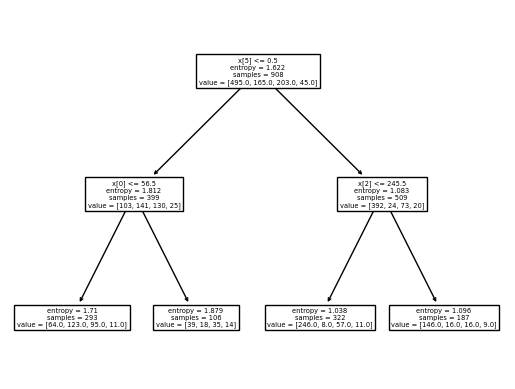

In [158]:
tree.plot_tree(model);

In [160]:
model.score(X_train,y_train)

0.6129476584022039

In [162]:
model.score(X_test,y_test)

0.5989010989010989

In [164]:
model.feature_importances_

array([0.09833304, 0.        , 0.05215993, 0.        , 0.        ,
       0.84950703])

In [168]:
list(data1.columns)

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'thal',
 'num']

In [174]:
data1['cp'].value_counts()

cp
asymptomatic       495
non-anginal        203
atypical angina    165
typical angina      45
Name: count, dtype: int64

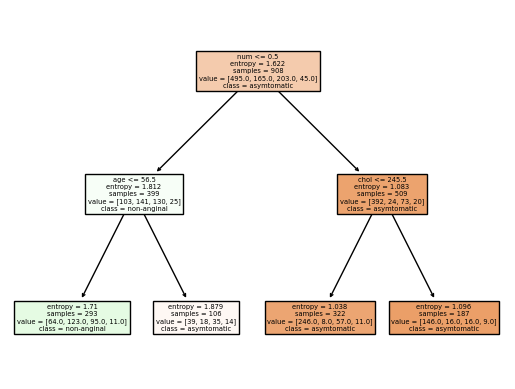

In [192]:
fn=['age','trestbps','chol','thalch','oldpeak','num']
cn=['asymtomatic','non-anginal','atypical angina','typical angina']
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);

In [194]:
feature_imp=pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False)

In [196]:
feature_imp

num         0.849507
age         0.098333
chol        0.052160
trestbps    0.000000
thalch      0.000000
oldpeak     0.000000
dtype: float64

In [198]:
model.feature_importances_

array([0.09833304, 0.        , 0.05215993, 0.        , 0.        ,
       0.84950703])

In [202]:
pd.crosstab(y_test,y_pred)

col_0,asymptomatic,atypical angina
cp,,
asymptomatic,76,11
atypical angina,9,33
non-anginal,21,25
typical angina,5,2


In [206]:
import numpy as np
np.mean(y_pred==y_test)

0.5989010989010989

## Cart model (GINI criterion)

In [233]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=2)

In [235]:
model_gini.fit(X,y)

DecisionTreeClassifier(max_depth=2)

In [237]:
ypred=model_gini.predict(X_test)

In [239]:
np.mean(ypred==y_test)

0.5989010989010989

In [241]:
model_gini.feature_importances_

array([0.07392725, 0.        , 0.        , 0.        , 0.04358206,
       0.88249068])

In [243]:
feature_imp=pd.Series(model_gini.feature_importances_,index=fn).sort_values(ascending=False)

In [245]:
feature_imp

num         0.882491
age         0.073927
oldpeak     0.043582
trestbps    0.000000
chol        0.000000
thalch      0.000000
dtype: float64

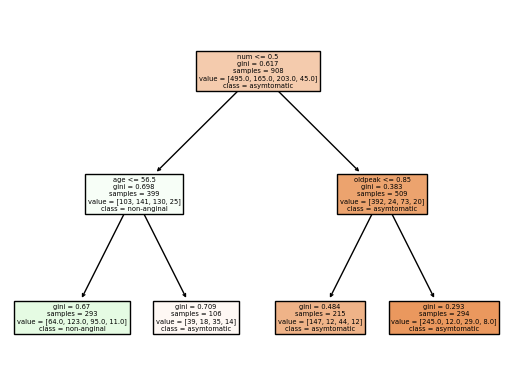

In [247]:
tree.plot_tree(model_gini,feature_names=fn,class_names=cn,filled=True);

In [249]:
model_gini.score(X_train,y_train)

0.6129476584022039

In [251]:
model_gini.score(X_test,y_test)

0.5989010989010989

## Decision Tree Regression Model

In [254]:
from sklearn.tree import DecisionTreeRegressor

In [280]:
numerical_cols.shape

(908, 6)

In [332]:
X=numerical_cols.drop('thalch',axis=1)
y=data1['thalch']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [334]:
reg_model=DecisionTreeRegressor(max_depth=3)
reg_model.fit(X,y)

DecisionTreeRegressor(max_depth=3)

In [336]:
reg_model.score(X_train,y_train)

0.2116033717566388

In [338]:
reg_model.score(X_test,y_test)

0.23545863585911508

In [340]:
reg_model.feature_importances_

array([0.27645662, 0.07489765, 0.08467777, 0.0099733 , 0.55399465])

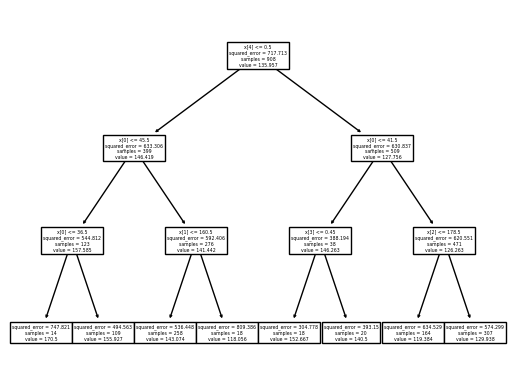

In [344]:
tree.plot_tree(reg_model);

In [346]:
reg_pred=reg_model.predict(X_test)

In [351]:
reg_pred

array([119.38414634, 119.38414634, 155.9266055 , 129.93811075,
       129.93811075, 119.38414634, 129.93811075, 143.07364341,
       119.38414634, 129.93811075, 129.93811075, 129.93811075,
       155.9266055 , 155.9266055 , 155.9266055 , 129.93811075,
       155.9266055 , 119.38414634, 129.93811075, 129.93811075,
       143.07364341, 155.9266055 , 143.07364341, 119.38414634,
       129.93811075, 129.93811075, 143.07364341, 129.93811075,
       129.93811075, 155.9266055 , 143.07364341, 129.93811075,
       143.07364341, 129.93811075, 143.07364341, 129.93811075,
       129.93811075, 143.07364341, 143.07364341, 119.38414634,
       155.9266055 , 155.9266055 , 143.07364341, 155.9266055 ,
       119.38414634, 143.07364341, 143.07364341, 155.9266055 ,
       155.9266055 , 118.05555556, 129.93811075, 119.38414634,
       129.93811075, 129.93811075, 143.07364341, 143.07364341,
       118.05555556, 143.07364341, 140.5       , 129.93811075,
       129.93811075, 155.9266055 , 129.93811075, 140.5 

In [353]:
np.mean(reg_pred==y_test)

0.0

# Interview Questions 
### 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
##### Some Common Hyperparameters
1. max_depth
2. min_sample_split
3. max_leaf_nodes
4. max_features
5. min_leaf_split
###### Overfitting: When hyperparameters like max_depth are set too high or parameters like min_samples_leaf are too low, the model can overfit by capturing too much noise.
###### Underfitting: Setting parameters like max_depth too low or min_samples_split too high can lead to underfitting, where the model fails to capture the underlying patterns.
###### Tuning these hyperparameters is essential in decision tree models, as it directly impacts their interpretability, complexity, and overall predictive power.

## 2. What is the difference between the Label encoding and One-hot encoding?
##### Representation: Label encoding uses a single column with integer values, while one-hot encoding uses multiple binary columns.
##### Ordinal Relationship: Label encoding implies an ordinal relationship; one-hot encoding does not.
##### Memory Usage: Label encoding is more memory-efficient, while one-hot encoding can increase dimensionality, especially with many categories.